# Run Main.ipynb

In [11]:
%run PreProccesser.ipynb

['C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Aave.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_BinanceCoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Bitcoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Cardano.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_ChainLink.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Cosmos.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_CryptocomCoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Dogec

# Forecast

# Initialization

Linear Regression Predict
Lasso Predict
Decision Tree Regressor Predict


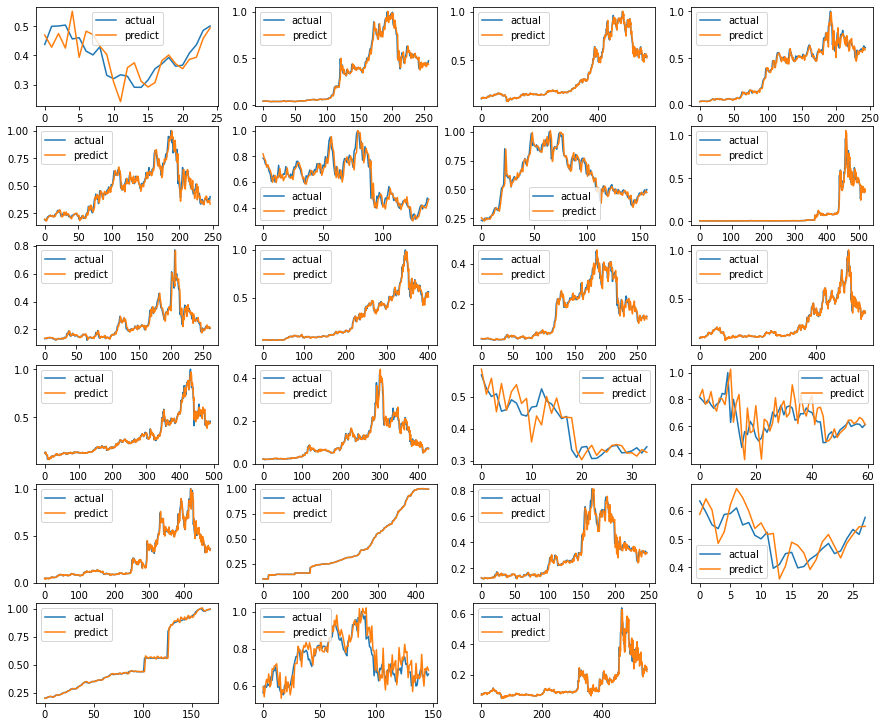

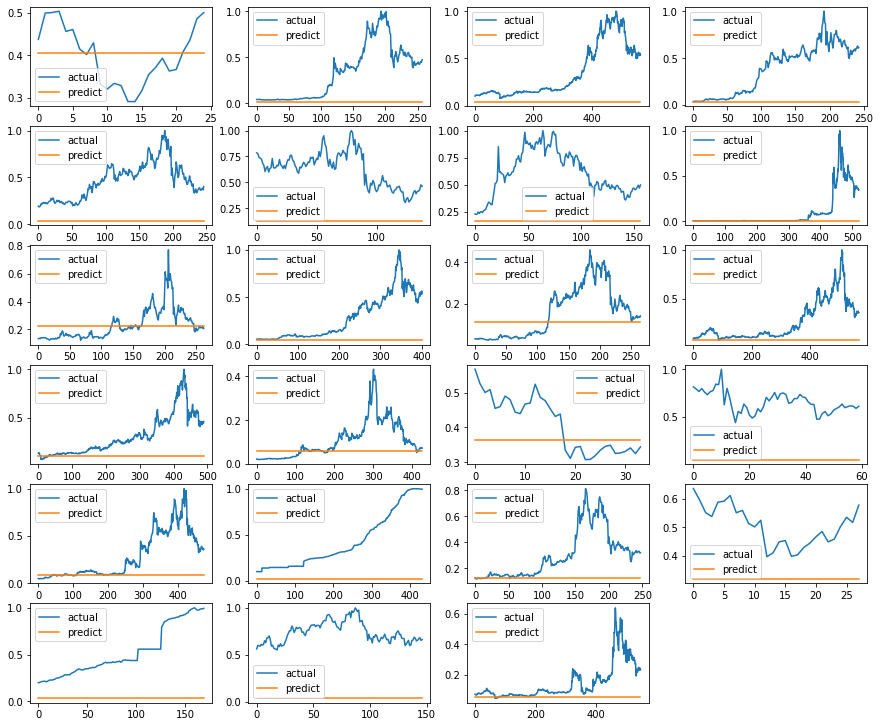

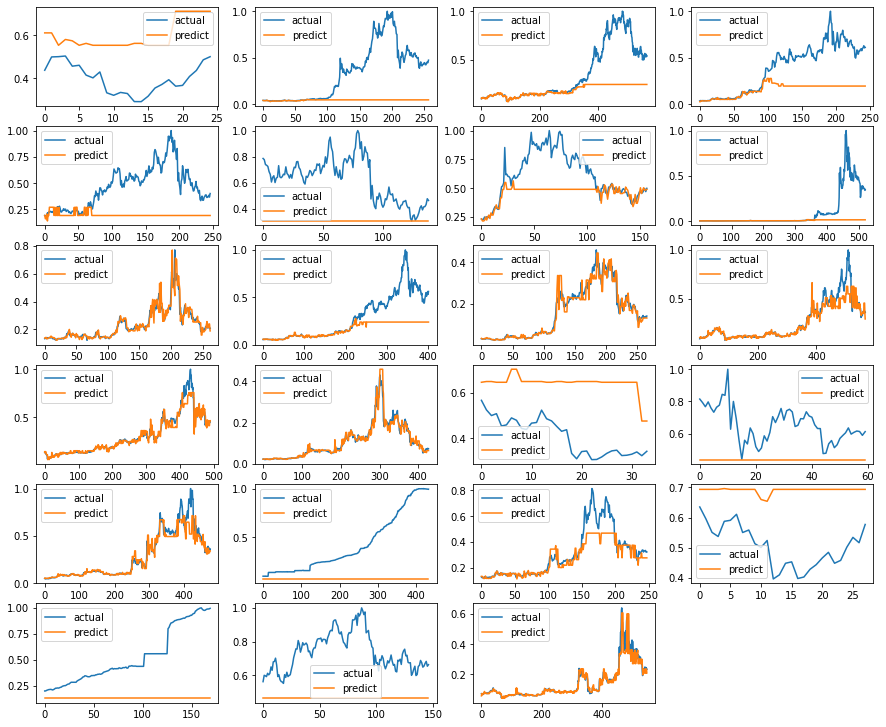

In [20]:
class forecast():  
    def Neural_network(self):
        def process_model_train(data): #argument data read from run function
            sc = MinMaxScaler(feature_range = (0,1))
            train_test = len(data) - int(.2*len(data))
            train = data.iloc[:train_test]            
            test = data.iloc[train_test:]             
            datafilter = data.iloc[:,7:8].values
            train = train.iloc[:,7:8].values    
            test = test.iloc[:,7:8].values      
            data = np.reshape(datafilter,(-1,1))
            train  = np.reshape(train,(-1,1))    
            test = np.reshape(test,(-1,1))        
            sc.fit(data)                
            train = sc.transform(train) 
            test =sc.transform(test)    
            x = []
            y = []
            time = 30                    
            for i in range(time,len(train)): 
                x.append(train[i-time:i,0]) 
                y.append(train[i,0])        
            x, y = np.array(x),np.array(y)              
            x = np.reshape(x,(x.shape[0],x.shape[1],1))    
            model = Sequential()                                              
            model.add(LSTM(128,input_shape = (x.shape[1], x.shape[2])))      
            model.add(Dropout(.3))                                            
            model.add(Dense(1))                                                
            model.add(Activation('linear'))                                   
            model.compile(optimizer= 'adam',loss='mae')        
            history = model.fit(x, y, validation_split=.2, epochs=5, batch_size=32)         
            x=[]
            y=[]
            time=30
            for i in range(time,len(test)):         
                x.append(test[i-time:i,0])
                y.append(test[i,0])
            x,y = np.array(x),np.array(y)              
            x  = np.reshape(x,(x.shape[0],x.shape[1],1))
            pred = model.predict(x)            
            result = model.evaluate(x,y)
            return result,pred,y
        def run():
            result ={}
            pred ={}
            actual ={}
            for i in paths:
                result[i],pred[i],actual[i] = process_model_train(data=pd.read_csv(i))             
            plt.figure(figsize=(15,15))
            for i in enumerate(paths):
                plt.subplot(7,4,i[0]+1)
                plt.plot(actual[i[1]],label='actual')
                plt.plot(pred[i[1]],label='predict')
                plt.legend(['actual','predict'])
        run()
    
    def Linear_Regression(self):
            def process_model_train(data): #argument data read from run function
                sc = MinMaxScaler(feature_range = (0,1))
                train_test = len(data) - int(.2*len(data))
                train = data.iloc[:train_test]            
                test = data.iloc[train_test:]             
                datafilter = data.iloc[0:,9:10].values
                train = train.iloc[0:,9:10].values    
                test = test.iloc[0:,9:10].values      
                data = np.reshape(datafilter,(-1,1))
                train  = np.reshape(train,(-1,1))    
                test = np.reshape(test,(-1,1))        
                sc.fit(data)                
                train = sc.transform(train) 
                test =sc.transform(test)    
                x = []
                y = []
                time = 30                    
                for i in range(time,len(train)): 
                    x.append(train[i-time:i,0]) 
                    y.append(train[i,0])        
                x, y = np.array(x),np.array(y)              
                x = np.reshape(x,(x.shape[0],x.shape[1]))    
                model=LinearRegression() 
                history = model.fit(x, y)        
                x=[]
                y=[]
                time=30
                for i in range(time,len(test)):         
                    x.append(test[i-time:i,0])
                    y.append(test[i,0])
                x,y = np.array(x),np.array(y)              
                x  = np.reshape(x,(x.shape[0],x.shape[1]))
                pred = model.predict(x)             
                return pred,y
            def run():

                pred ={}
                actual ={}
                for i in paths:
                    pred[i],actual[i] = process_model_train(data=pd.read_csv(i))           
                plt.figure(figsize=(15,15))
                for i in enumerate(paths):
                    plt.subplot(7,4,i[0]+1)
                    plt.plot(actual[i[1]],label='actual')
                    plt.plot(pred[i[1]],label='predict')
                    plt.legend(['actual','predict'])
            run()

    def Lasso(self):
            def process_model_train(data): #argument data read from run function
                sc = MinMaxScaler(feature_range = (0,1))
                train_test = len(data) - int(.2*len(data))
                train = data.iloc[:train_test]            
                test = data.iloc[train_test:]             
                datafilter = data.iloc[0:,9:10].values
                train = train.iloc[0:,9:10].values    
                test = test.iloc[0:,9:10].values      
                data = np.reshape(datafilter,(-1,1))
                train  = np.reshape(train,(-1,1))    
                test = np.reshape(test,(-1,1))        
                sc.fit(data)                
                train = sc.transform(train) 
                test =sc.transform(test)    
                x = []
                y = []
                time = 30                    
                for i in range(time,len(train)): 
                    x.append(train[i-time:i,0]) 
                    y.append(train[i,0])        
                x, y = np.array(x),np.array(y)              
                x = np.reshape(x,(x.shape[0],x.shape[1]))    
                model=Lasso() 
                history = model.fit(x, y)        
                x=[]
                y=[]
                time=30
                for i in range(time,len(test)):         
                    x.append(test[i-time:i,0])
                    y.append(test[i,0])
                x,y = np.array(x),np.array(y)              
                x  = np.reshape(x,(x.shape[0],x.shape[1]))
                pred = model.predict(x)            
                return pred,y
            def run():

                pred ={}
                actual ={}
                for i in paths:
                    pred[i],actual[i] = process_model_train(data=pd.read_csv(i))          
                plt.figure(figsize=(15,15))
                for i in enumerate(paths):
                    plt.subplot(7,4,i[0]+1)
                    plt.plot(actual[i[1]],label='actual')
                    plt.plot(pred[i[1]],label='predict')
                    plt.legend(['actual','predict'])
            run()

    def Decision_Tree_Regressor(self):
            def process_model_train(data): #argument data read from run function
                sc = MinMaxScaler(feature_range = (0,1))
                train_test = len(data) - int(.2*len(data))
                train = data.iloc[:train_test]            
                test = data.iloc[train_test:]             
                datafilter = data.iloc[0:,9:10].values
                train = train.iloc[0:,9:10].values    
                test = test.iloc[0:,9:10].values      
                data = np.reshape(datafilter,(-1,1))
                train  = np.reshape(train,(-1,1))    
                test = np.reshape(test,(-1,1))        
                sc.fit(data)                
                train = sc.transform(train) 
                test =sc.transform(test)    
                x = []
                y = []
                time = 30                    
                for i in range(time,len(train)): 
                    x.append(train[i-time:i,0]) 
                    y.append(train[i,0])        
                x, y = np.array(x),np.array(y)              
                x = np.reshape(x,(x.shape[0],x.shape[1]))    
                model=DecisionTreeRegressor() 
                history = model.fit(x, y)        
                x=[]
                y=[]
                time=30
                for i in range(time,len(test)):         
                    x.append(test[i-time:i,0])
                    y.append(test[i,0])
                x,y = np.array(x),np.array(y)              
                x  = np.reshape(x,(x.shape[0],x.shape[1]))
                pred = model.predict(x)            
                return pred,y
            def run():
                pred ={}
                actual ={}
                for i in paths:
                    pred[i],actual[i] = process_model_train(data=pd.read_csv(i))           
                plt.figure(figsize=(15,15))
                for i in enumerate(paths):
                    plt.subplot(7,4,i[0]+1)
                    plt.plot(actual[i[1]],label='actual')
                    plt.plot(pred[i[1]],label='predict')
                    plt.legend(['actual','predict'])
            run()
      
fc = forecast()
print('Neural network Predict')
fc.Neural_network()
print('Linear Regression Predict')
fc.Linear_Regression()
print('Lasso Predict')
fc.Lasso()
print('Decision Tree Regressor Predict')
fc.Decision_Tree_Regressor()